<a href="https://colab.research.google.com/github/KilledByBugs/CE888_Assignments/blob/main/EFFNET_COVID19_Classification_TransferLearning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!git clone https://github.com/UCSD-AI4H/COVID-CT.git #clone data

Cloning into 'COVID-CT'...
remote: Enumerating objects: 5463, done.
remote: Counting objects: 100% (4/4), done.
remote: Compressing objects: 100% (4/4), done.
remote: Total 5463 (delta 0), reused 0 (delta 0), pack-reused 5459
Receiving objects: 100% (5463/5463), 1.09 GiB | 26.64 MiB/s, done.
Resolving deltas: 100% (360/360), done.
Checking out files: 100% (1048/1048), done.


In [2]:
#unzip archives
!unzip -q -n '/content/COVID-CT/Images-processed/CT_COVID.zip'  
!unzip -q -n '/content/COVID-CT/Images-processed/CT_NonCOVID.zip'

In [3]:
#count files in each class
import os 
path='/content/CT_COVID/' 
for count, filename in enumerate(os.listdir(path)): 
    dst ="covid-" + str(count) + ".png" #destination
    src =path+ filename #source
    dst =path+ dst 
        
    # rename() function will 
    # rename all the files 
    os.rename(src, dst)
print("Covid Positive cases: ", count)

path='/content/CT_NonCOVID/'
for count, filename in enumerate(os.listdir(path)): 
    dst ="noncovid-" + str(count) + ".png"
    src =path+ filename 
    dst =path+ dst 
        
    # rename() function will 
    # rename all the files 
    os.rename(src, dst)

print("Covid Negative cases: ", count)

Covid Positive cases:  348
Covid Negative cases:  396


In [4]:
base_dir = '/content/covid19_CT'  #create base directory
if not os.path.exists(base_dir): os.mkdir(base_dir)

In [5]:
train_dir = os.path.join(base_dir, 'train') #create directory for training data
if not os.path.exists(train_dir): os.mkdir(train_dir)

validation_dir = os.path.join(base_dir, 'validation') #create directory for validation data
if not os.path.exists(validation_dir):os.mkdir(validation_dir)

test_dir = os.path.join(base_dir, 'test') #create directory with test data
if not os.path.exists(test_dir):os.mkdir(test_dir)

In [6]:
original_dataset_dir_covid = '/content/CT_COVID/'
original_dataset_dir_non_covid = '/content/CT_NonCOVID/'
#CT_COVID：
#training set: 0-250 ，validation set: 250-300，testing set: 300-348

import shutil 
fnames = ['covid-{}.png'.format(i) for i in range(250)]
for fname in fnames:
    src = os.path.join(original_dataset_dir_covid, fname)
    dst = os.path.join(train_dir, fname)
    #print(src,dst)
    shutil.copyfile(src, dst)
    
fnames = ['covid-{}.png'.format(i) for i in range(250, 300)]
for fname in fnames:
    src = os.path.join(original_dataset_dir_covid, fname)
    dst = os.path.join(validation_dir, fname)
    shutil.copyfile(src, dst)

fnames = ['covid-{}.png'.format(i) for i in range(300, 348)]
for fname in fnames:
    src = os.path.join(original_dataset_dir_covid, fname)
    dst = os.path.join(test_dir, fname)
    shutil.copyfile(src, dst)

In [7]:
#CT_non_COVID：
#training set: 0-250 ，validation set: 250-300，testing set: 300-348

fnames = ['noncovid-{}.png'.format(i) for i in range(250)]
for fname in fnames:
    src = os.path.join(original_dataset_dir_non_covid, fname)
    dst = os.path.join(train_dir, fname)
    shutil.copyfile(src, dst)

fnames = ['noncovid-{}.png'.format(i) for i in range(250, 300)]
for fname in fnames:
    src = os.path.join(original_dataset_dir_non_covid, fname)
    dst = os.path.join(validation_dir, fname)
    shutil.copyfile(src, dst)

fnames = ['noncovid-{}.png'.format(i) for i in range(300, 348)]
for fname in fnames:
    src = os.path.join(original_dataset_dir_non_covid, fname)
    dst = os.path.join(test_dir, fname)
    shutil.copyfile(src, dst)

1. Visualising a few CT_COVID and CT_NonCOVID


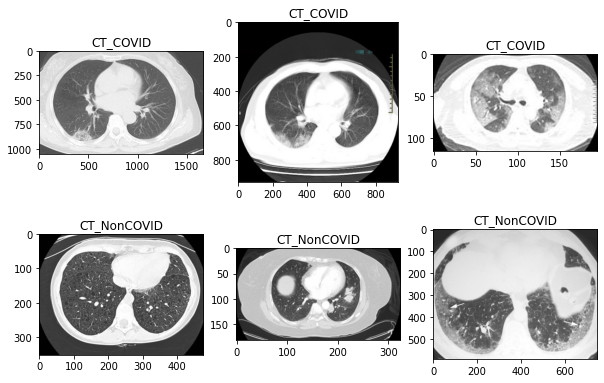

In [8]:
import cv2
CT_img = []
CT_img.append(cv2.imread(original_dataset_dir_covid + 'covid-0.png'))
CT_img.append(cv2.imread(original_dataset_dir_covid + 'covid-1.png'))
CT_img.append(cv2.imread(original_dataset_dir_covid + 'covid-2.png'))
#now reading CT_NonCOVID images
CT_img.append(cv2.imread(original_dataset_dir_non_covid + 'noncovid-0.png'))
CT_img.append(cv2.imread(original_dataset_dir_non_covid + 'noncovid-1.png'))
CT_img.append(cv2.imread(original_dataset_dir_non_covid + 'noncovid-2.png'))


labels = ['CT_COVID','CT_COVID','CT_COVID','CT_NonCOVID','CT_NonCOVID','CT_NonCOVID']

import matplotlib.pyplot as plt

plt.figure(figsize=[10,10])
for x in range(0,6):
    plt.subplot(3, 3,x+1)
    plt.imshow(CT_img[x])
    plt.title(labels[x])
    x += 1
    
plt.show()

2. Pre-processing and labeling

In [9]:
import numpy as np
from random import shuffle

IMG_SIZE = 224
LR = 1e-4

In [10]:
#labeling
def label_img(img):
    word_label = img.split('-')[0]
    if word_label == 'covid': return 1
    elif word_label == 'noncovid': return 0

In [11]:
def createDataSplitSet(datapath):
    X=[]
    y=[]
    #Normalization， standardization
    for img in os.listdir(datapath):
        label = label_img(img)
        path = os.path.join(datapath, img)
        image = cv2.resize(cv2.imread(path), (IMG_SIZE, IMG_SIZE))  
        image = cv2.normalize(image, None, alpha=0, beta=1, norm_type=cv2.NORM_MINMAX, dtype=cv2.CV_32F)

        X.append(np.array(image))
        y.append(label)

    return np.array(X), np.array(y)

In [12]:
train_X, train_y = createDataSplitSet(train_dir)
val_X, val_y = createDataSplitSet(validation_dir)
test_X, test_y = createDataSplitSet(test_dir)
print(train_X.shape)
print(val_X.shape)
print(test_X.shape)

(500, 224, 224, 3)
(100, 224, 224, 3)
(96, 224, 224, 3)


3. Data exploration

In [13]:
n_train = train_y.shape[0]
n_val = val_y[0]
n_test = test_y.shape[0]

print ("Number of training examples: {}".format(n_train))
print ("Number of validation examples: {}".format(n_train))
print ("Number of testing examples: {}".format(n_test))
print ("Each image is of size:",IMG_SIZE, "*", IMG_SIZE)

Number of training examples: 500
Number of validation examples: 500
Number of testing examples: 96
Each image is of size: 224 * 224


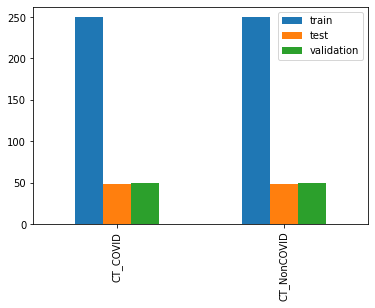

In [14]:
import pandas as pd
class_names = ['CT_COVID','CT_NonCOVID']

_, train_counts = np.unique(train_y, return_counts=True)
_, test_counts = np.unique(test_y, return_counts=True)
_, validation_counts = np.unique(val_y, return_counts=True)
pd.DataFrame({'train': train_counts,
                    'test': test_counts,  'validation': validation_counts}, 
             index=class_names
            ).plot.bar()
plt.show()

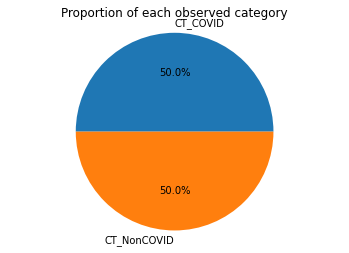

In [15]:
plt.pie(train_counts,
        explode=(0, 0) , 
        labels=class_names,
        autopct='%1.1f%%')
plt.axis('equal')
plt.title('Proportion of each observed category')
plt.show()

4. Model Training

In [16]:
## EfficientNet

from tensorflow.keras.applications import EfficientNetB3
from tensorflow.keras.layers import Dense, Input, Flatten
from tensorflow.keras import Model

img_input = Input(shape=(IMG_SIZE, IMG_SIZE, 3))

In [17]:
model = EfficientNetB3(
    include_top=True,
    weights="imagenet", #weights: one of None (random initialization), 'imagenet' (pre-training on ImageNet), or the path to the weights file to be loaded.
    input_tensor=img_input,
    input_shape=None,
    pooling=None,
    classes=1000,
    classifier_activation="softmax",
)

model.summary()

50110464/50095040 [==============================] - 1s 0us/step
Model: "efficientnetb3"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 224, 224, 3) 0                                            
__________________________________________________________________________________________________
rescaling (Rescaling)           (None, 224, 224, 3)  0           input_1[0][0]                    
__________________________________________________________________________________________________
normalization (Normalization)   (None, 224, 224, 3)  7           rescaling[0][0]                  
__________________________________________________________________________________________________
stem_conv_pad (ZeroPadding2D)   (None, 225, 225, 3)  0           normalization[0][0]              
____________________

In [18]:
from tensorflow.keras.layers import GlobalAveragePooling2D, BatchNormalization, Dropout
from tensorflow.keras.optimizers import Adam
from keras.models import Sequential

efficient_net = EfficientNetB3(
    weights='imagenet',
    include_top=False,
    pooling='max'
)

model = Sequential()
model.add(efficient_net)
model.add(Dense(units = 128, activation='LeakyReLU'))  
model.add(Dense(units = 64, activation = 'LeakyReLU')) 
model.add(Dense(units = 1, activation='sigmoid')) #output: 2 classes
model.summary()



43950080/43941136 [==============================] - 2s 0us/step
Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
efficientnetb3 (Functional)  (None, 1536)              10783535  
_________________________________________________________________
dense (Dense)                (None, 128)               196736    
_________________________________________________________________
dense_1 (Dense)              (None, 64)                8256      
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 65        
Total params: 10,988,592
Trainable params: 10,901,289
Non-trainable params: 87,303
_________________________________________________________________


In [19]:
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint, ReduceLROnPlateau

callbacks = [
    ModelCheckpoint(filepath='efficientnetBestModel.h5', monitor='val_loss', verbose=1, save_best_only=True),  # saving model
    ReduceLROnPlateau(monitor='val_loss', factor=0.1, patience=10, verbose=1),  # if training doesn't improve performance for many times, lower learning rate
    EarlyStopping(monitor='val_loss', patience=30, verbose=1),  # if training doesn't improve performance for too many times, stop training
]

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])


In [20]:
history = model.fit(train_X, train_y,
                    batch_size=20,
                    epochs=100, 
                    validation_data=(val_X, val_y),
                    callbacks=callbacks)

Epoch 1/100
25/25 [==============================] - 38s 449ms/step - loss: 1.8358 - accuracy: 0.6240 - val_loss: 0.7224 - val_accuracy: 0.5000

Epoch 00001: val_loss improved from inf to 0.72235, saving model to efficientnetBestModel.h5


/usr/local/lib/python3.7/dist-packages/keras/utils/generic_utils.py:497: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  category=CustomMaskWarning)


Epoch 2/100
25/25 [==============================] - 9s 375ms/step - loss: 0.3948 - accuracy: 0.8540 - val_loss: 0.7717 - val_accuracy: 0.5000

Epoch 00002: val_loss did not improve from 0.72235
Epoch 3/100
25/25 [==============================] - 9s 374ms/step - loss: 0.2146 - accuracy: 0.9200 - val_loss: 1.4894 - val_accuracy: 0.5000

Epoch 00003: val_loss did not improve from 0.72235
Epoch 4/100
25/25 [==============================] - 9s 376ms/step - loss: 0.2095 - accuracy: 0.9340 - val_loss: 1.6708 - val_accuracy: 0.5000

Epoch 00004: val_loss did not improve from 0.72235
Epoch 5/100
25/25 [==============================] - 10s 383ms/step - loss: 0.1907 - accuracy: 0.9400 - val_loss: 1.7949 - val_accuracy: 0.5000

Epoch 00005: val_loss did not improve from 0.72235
Epoch 6/100
25/25 [==============================] - 10s 386ms/step - loss: 0.0955 - accuracy: 0.9580 - val_loss: 3.6318 - val_accuracy: 0.5000

Epoch 00006: val_loss did not improve from 0.72235
Epoch 7/100
25/25 [====

In [21]:
model.summary()


Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
efficientnetb3 (Functional)  (None, 1536)              10783535  
_________________________________________________________________
dense (Dense)                (None, 128)               196736    
_________________________________________________________________
dense_1 (Dense)              (None, 64)                8256      
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 65        
Total params: 10,988,592
Trainable params: 10,901,289
Non-trainable params: 87,303
_________________________________________________________________


5. Performance Checking

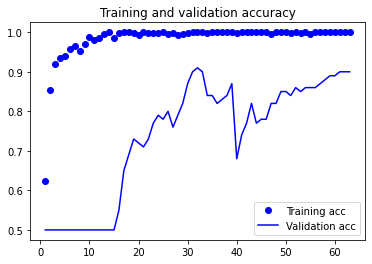

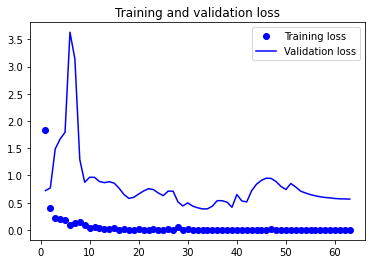

In [22]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc) + 1)

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

In [23]:

from sklearn.metrics import accuracy_score

## Test Accuracy
predictions = model.predict(test_X)
ypred = predictions > 0.5
test_acc = accuracy_score(test_y, ypred)

from sklearn.metrics import precision_recall_fscore_support, roc_auc_score

precision, recall, f1score, _ = precision_recall_fscore_support(test_y, ypred, average='binary')

auc = roc_auc_score(test_y, ypred)

print("Train Accuracy:\t", acc[-1])
print("Val Accuracy:\t", val_acc[-1])
print("Test Accuracy:\t", test_acc)
print("Precision:\t", precision)
print("Recall:\t\t", recall)
print("F1 Score:\t", f1score)
print("AUC:\t\t", auc)


Train Accuracy:	 1.0
Val Accuracy:	 0.8999999761581421
Test Accuracy:	 0.9270833333333334
Precision:	 0.9183673469387755
Recall:		 0.9375
F1 Score:	 0.9278350515463918
AUC:		 0.9270833333333333
